In [1]:
import datetime
import numpy as np
import graphlab as gl
from copy import deepcopy
from sklearn import tree
import graphviz 
from string import ascii_letters
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This non-commercial license of GraphLab Create for academic use is assigned to vidurk@vt.edu and will expire on April 29, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1525233277.log


In [2]:
dataFull = gl.SFrame.read_csv('train.csv', verbose=False)

In [3]:
dataBackup = dataFull.sample(0.005, seed=5)
data = deepcopy(dataBackup)

In [4]:
data['device_type'] = data['device_type'].astype(str)
data['C1'] = data['C1'].astype(str)
data['hour'] = data['hour'].astype(str)

In [5]:
def GetDate(date_raw):
    return date_raw[4:6]

In [6]:
data['date']=data['hour']
data['date']=data['date'].apply(GetDate)

In [7]:
def isItAWeekDay(timeStamp):
    timeStamp = str(timeStamp)
    year  = int(timeStamp[0:2])
    month = int(timeStamp[2:4])
    day   = int(timeStamp[4:6])
    off = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    a = 1
    if month > 2: a = 0
    x = year - 1700 - a
    dow  = 5
    dow += (x + a) * 365
    dow += x / 4 - x / 100 + (x + 100) / 400     
    dow += off[month - 1] + (day - 1)               
    dow %= 7
    if dow == 0 or dow == 6: return 0; #Sunday or Saturday
    return 1;

In [8]:
def keepHour(timeStamp):
    timeStamp = str(timeStamp)
    return timeStamp[-2:];

In [9]:
data['isWeekDay'] = data['hour']
data['isWeekDay'] = data['isWeekDay'].apply(isItAWeekDay)
data['hour'] = data['hour'].apply(keepHour)
data['area'] = data['C15']*data['C16'];
data['hour']= data['hour'].astype(int);

In [10]:
training_data, testing_data = data.random_split(0.8)

In [21]:
#Logitic Classifier
model_logistic_class_1 = gl.logistic_classifier.create(training_data, target='click', features=[ 'device_type','area','C1','C15','C20','C17','app_id','date'],max_iterations=1000)
model_logistic_class_1.evaluate(testing_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 154195

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

Number of coefficients    : 1623

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000006  | 0.152697     | 0.829320          | 0.836737            |

| 2         | 5        | 1.000000  | 0.277620     | 0.829430          | 0.836737            |

| 3         | 6        | 1.000000  | 0.359955     | 0.830941          | 0.837232            |

| 4         | 7        | 1.000000  | 0.453545     | 0.830915          | 0.837232            |

| 5         | 8        | 1.000000  | 0.552073     | 0.830773          | 0.837356            |

| 6         | 9        | 1.000000  | 0.668405     | 0.830468          | 0.837109            |

| 10        | 13       | 1.000000  | 1.003744     | 0.830611          | 0.837480            |

| 11        | 14       | 1.000000  | 1.087258     | 0.830695          | 0.837727            |

| 20        | 24       | 1.000000  | 1.801227     | 0.831129          | 0.837356            |

| 30        | 34       | 1.000000  | 2.509315     | 0.831142          | 0.837480            |

| 40        | 44       | 1.000000  | 3.204395     | 0.831155          | 0.837480            |

| 50        | 55       | 1.000000  | 3.953160     | 0.831162          | 0.837480            |

| 51        | 56       | 1.000000  | 4.044713     | 0.831155          | 0.837480            |

| 60        | 66       | 1.000000  | 4.753481     | 0.831162          | 0.837480            |

| 70        | 79       | 1.000000  | 5.595951     | 0.831162          | 0.837480            |

| 80        | 91       | 1.000000  | 6.408171     | 0.831162          | 0.837480            |

| 90        | 104      | 1.000000  | 7.261630     | 0.831162          | 0.837480            |

| 100       | 122      | 1.000000  | 8.292608     | 0.831162          | 0.837480            |

| 101       | 123      | 1.000000  | 8.366298     | 0.831162          | 0.837480            |

| 110       | 137      | 1.000000  | 9.223997     | 0.831162          | 0.837480            |

| 120       | 151      | 1.000000  | 10.181676    | 0.831162          | 0.837480            |

| 130       | 163      | 1.000000  | 11.003907    | 0.831162          | 0.837480            |

| 140       | 173      | 1.000000  | 11.739383    | 0.831162          | 0.837480            |

| 150       | 183      | 1.000000  | 12.463370    | 0.831162          | 0.837480            |

| 160       | 199      | 1.000000  | 13.417528    | 0.831162          | 0.837480            |

| 170       | 212      | 1.000000  | 14.243691    | 0.831162          | 0.837480            |

| 180       | 222      | 1.000000  | 15.011364    | 0.831162          | 0.837480            |

| 190       | 235      | 1.000000  | 15.830656    | 0.831162          | 0.837480            |

| 200       | 246      | 1.000000  | 16.581705    | 0.831162          | 0.837480            |

| 210       | 258      | 1.000000  | 17.413935    | 0.831162          | 0.837480            |

| 220       | 277      | 1.000000  | 18.456852    | 0.831162          | 0.837480            |

| 230       | 295      | 1.000000  | 19.485419    | 0.831162          | 0.837480            |

| 240       | 311      | 1.000000  | 20.410502    | 0.831162          | 0.837480            |

| 250       | 321      | 1.000000  | 21.914779    | 0.831162          | 0.837480            |

| 260       | 332      | 1.000000  | 22.662532    | 0.831162          | 0.837480            |

| 270       | 347      | 1.000000  | 23.578624    | 0.831162          | 0.837480            |

| 280       | 360      | 1.000000  | 24.401235    | 0.831162          | 0.837480            |

| 290       | 372      | 1.000000  | 25.183910    | 0.831162          | 0.837480            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

{'accuracy': 0.8284223602484472,
 'auc': 0.6596658146241532,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   62  |
 |      0       |        0        | 33280 |
 |      1       |        1        |   64  |
 |      1       |        0        |  6844 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.018197327267557576,
 'log_loss': 0.4466140582267808,
 'precision': 0.5079365079365079,
 'recall': 0.009264620729588882,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+----------------+------+-------+
 | threshold |      fpr       |      tpr       |  p   |   n   |
 +-----------+----------------+----------------+------+-------+
 |    0.0    |      1.0     

In [14]:
#Random Forest Classifier
training_data_random_forest= training_data[ 'device_type','area','C1','C15','C20','C17','app_id','click','date']
#testing_data_random_forest= testing_data[ 'device_type','area','C1', 'C15','C20','C17','app_id','click','date']
model_random_2 = gl.random_forest_classifier.create(training_data_random_forest, target='click',max_iterations=20,max_depth =25)
model_random_2.evaluate(testing_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 154002

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.214349     | 0.830639          | 0.833777            | 0.444217          | 0.439998            |

| 2         | 0.404984     | 0.832755          | 0.833656            | 0.438652          | 0.436820            |

| 3         | 0.711988     | 0.834807          | 0.833293            | 0.431123          | 0.433152            |

| 4         | 0.952742     | 0.835742          | 0.833897            | 0.428286          | 0.431601            |

| 5         | 1.199099     | 0.836268          | 0.833777            | 0.426469          | 0.430466            |

| 6         | 1.463183     | 0.836255          | 0.833897            | 0.425122          | 0.430021            |

| 10        | 2.376120     | 0.835775          | 0.834502            | 0.427048          | 0.430522            |

| 11        | 2.679715     | 0.835866          | 0.834744            | 0.426304          | 0.430246            |

| 15        | 3.739707     | 0.836359          | 0.834381            | 0.424876          | 0.429556            |

| 20        | 4.963080     | 0.836080          | 0.834260            | 0.425182          | 0.429643            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

{'accuracy': 0.8299875776397515,
 'auc': 0.7115118099114751,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  302  |
 |      0       |        0        | 33040 |
 |      1       |        1        |  367  |
 |      1       |        0        |  6541 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.09687211297347235,
 'log_loss': 0.43413716192081553,
 'precision': 0.5485799701046338,
 'recall': 0.05312680949623625,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+-------+
 | threshold | fpr | tpr |  p   |   n   |
 +-----------+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 6908 | 33342 |
 |   1e-05   | 1.0 | 1.0 | 6908 | 33342 |
 |   2e-05 

In [15]:
#GBDT Classifier
training_data_gbdt= training_data[ 'hour','device_type','isWeekDay','area','C1','C15','C20','C17','app_id','click','date']
#testing_data_gbdt= valid_data[ 'hour','device_type','isWeekDay','area','C1','C15','C20','C17','app_id','click','date']
model_gbdt_1 = gl.boosted_trees_classifier.create(training_data_gbdt, target='click',max_depth =20)
model_gbdt_1.evaluate(training_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 154068

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 10

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.283420     | 0.851955          | 0.813307            | 0.561799          | 0.574581            |

| 2         | 0.560340     | 0.851312          | 0.814404            | 0.488902          | 0.513306            |

| 3         | 0.863005     | 0.852701          | 0.813064            | 0.443879          | 0.479873            |

| 4         | 1.158006     | 0.853772          | 0.813429            | 0.414428          | 0.460379            |

| 5         | 1.440451     | 0.854454          | 0.813673            | 0.394195          | 0.450182            |

| 6         | 1.702955     | 0.854999          | 0.811845            | 0.380741          | 0.445254            |

| 10        | 2.826111     | 0.854279          | 0.814282            | 0.359456          | 0.440423            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

{'accuracy': 0.8522437359034719,
 'auc': 0.8166946776026734,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+--------+
 | target_label | predicted_label | count  |
 +--------------+-----------------+--------+
 |      0       |        1        |  1092  |
 |      0       |        0        | 133545 |
 |      1       |        1        |  4752  |
 |      1       |        0        | 22885  |
 +--------------+-----------------+--------+
 [4 rows x 3 columns],
 'f1_score': 0.28386248917296375,
 'log_loss': 0.36355009627501006,
 'precision': 0.813141683778234,
 'recall': 0.17194340919781453,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-------+--------+
 | threshold | fpr | tpr |   p   |   n    |
 +-----------+-----+-----+-------+--------+
 |    0.0    | 1.0 | 1.0 | 27637 | 134637 |
 |   1e-05   | 1.0 | 1.0 | 27637 | 134

In [18]:
#Decision Tree
training_data_decision_tree= training_data[ 'hour','device_type','isWeekDay','area','C1', 'C15','C20','C17','app_id','click','date']
#testing_data_decision_tree= testing_data[ 'hour','device_type','isWeekDay','area','C1', 'C15','C20','C17','app_id','click','date']
model_decision_tree_1 = gl.decision_tree_classifier.create(training_data_decision_tree, target='click',max_depth =10)
model_decision_tree_1.evaluate(testing_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Decision tree classifier:

--------------------------------------------------------

Number of examples          : 154193

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 10

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.167052     | 0.835472          | 0.827497            | 0.569854          | 0.571495            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

{'accuracy': 0.8291925465838509,
 'auc': 0.6886914345813819,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  472  |
 |      0       |        0        | 32870 |
 |      1       |        1        |  505  |
 |      1       |        0        |  6403 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.12809131261889664,
 'log_loss': 0.5716265647397741,
 'precision': 0.5168884339815762,
 'recall': 0.07310364794441228,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+-------+
 | threshold | fpr | tpr |  p   |   n   |
 +-----------+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 6908 | 33342 |
 |   1e-05   | 1.0 | 1.0 | 6908 | 33342 |
 |   2e-05  

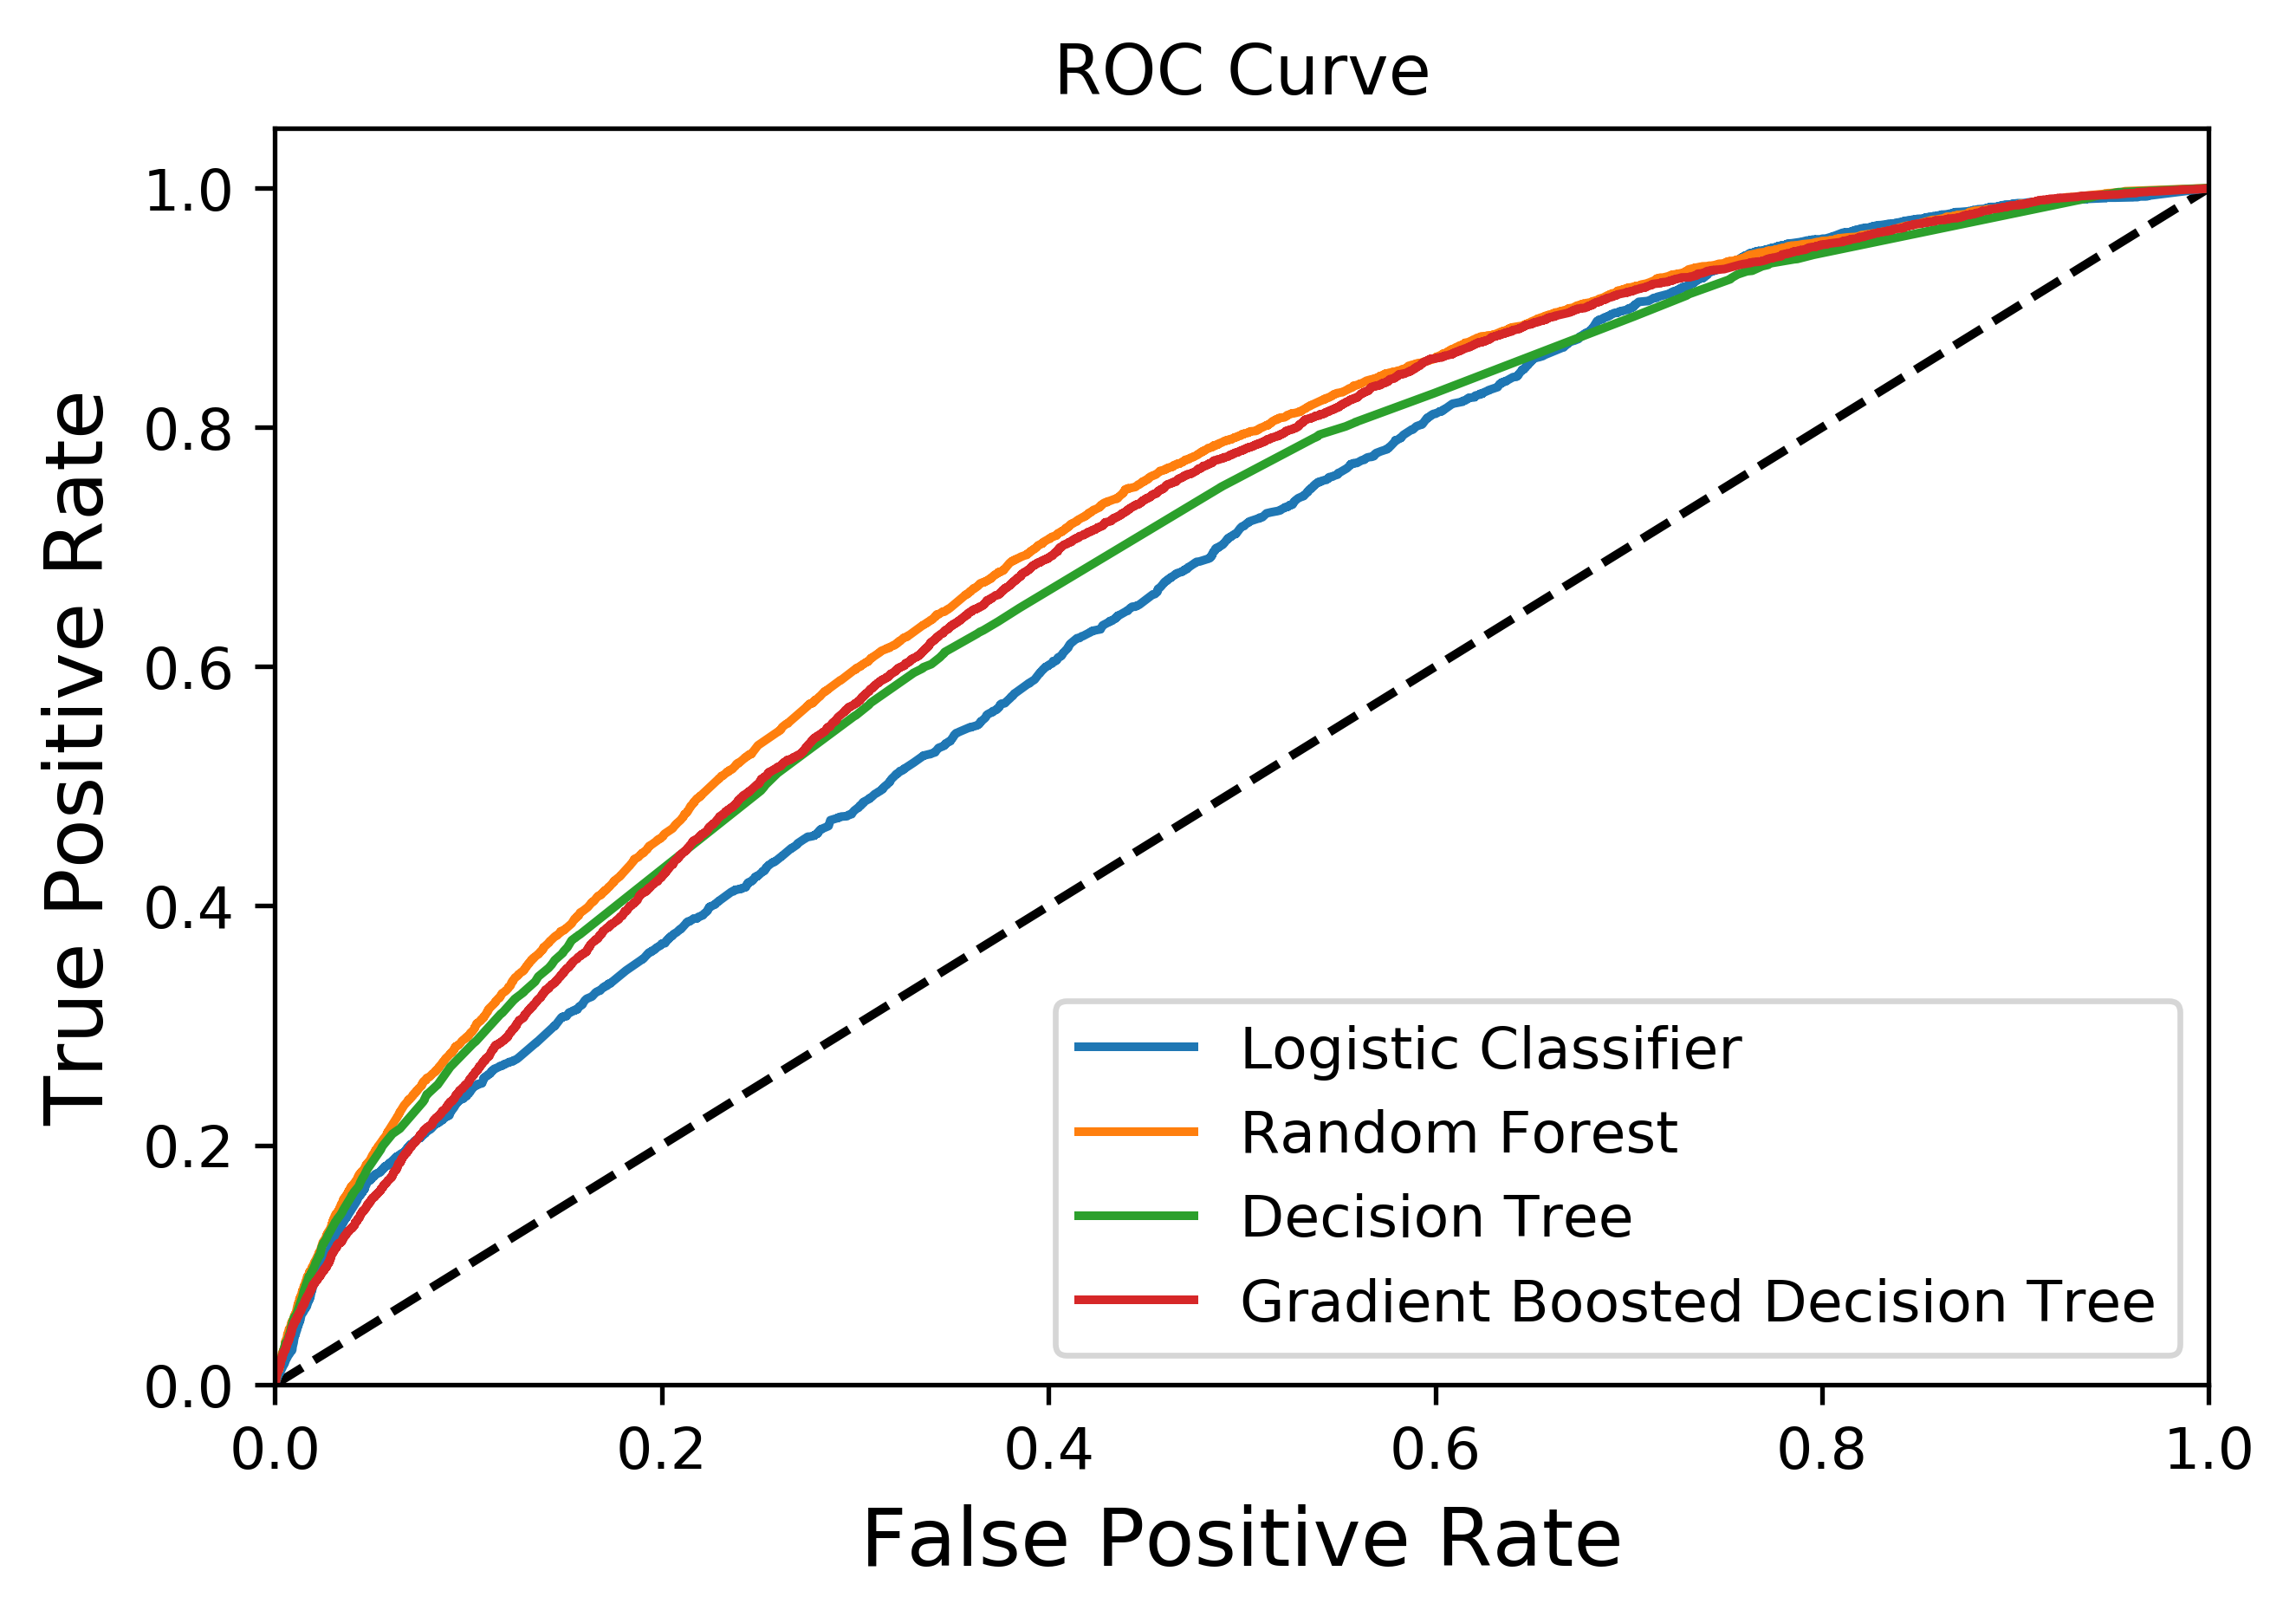

0.659665814624
0.711511809911
0.688691434581
0.696442955665


In [28]:
#ROC Curve
fig,ax=plt.subplots(num=None, figsize=(6, 4), dpi=480, facecolor='w', edgecolor='k');
plt.plot([0,1],[0,1],'k--')

#Logistic Classfier
plt.plot(model_logistic_class_1.evaluate(testing_data)['roc_curve']['fpr'],model_logistic_class_1.evaluate(testing_data)['roc_curve']['tpr'],label='Logistic Classifier')

#Random Forest Classfier
plt.plot(model_random_2.evaluate(testing_data)['roc_curve']['fpr'],model_random_2.evaluate(testing_data)['roc_curve']['tpr'],label='Random Forest')

#Decision Tree Classfier
plt.plot(model_decision_tree_1.evaluate(testing_data)['roc_curve']['fpr'],model_decision_tree_1.evaluate(testing_data)['roc_curve']['tpr'],label='Decision Tree')

#Gradient Boosted Decision Tree
plt.plot(model_gbdt_1.evaluate(testing_data)['roc_curve']['fpr'],model_gbdt_1.evaluate(testing_data)['roc_curve']['tpr'],label='Gradient Boosted Decision Tree')

plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
plt.title('ROC Curve',fontsize = 12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.legend()
plt.show()

print model_logistic_class_1.evaluate(testing_data)['auc']
print model_random_2.evaluate(testing_data)['auc']
print model_decision_tree_1.evaluate(testing_data)['auc']
print model_gbdt_1.evaluate(testing_data)['auc']


fig.savefig('ROC_Curve.png', bbox_inches='tight')

#print model_logistic_class_1.evaluate(training_data)['roc_curve']['tpr'];

In [26]:
#Area Under The Curve
print 'Logistic Classifer',model_logistic_class_1.evaluate(testing_data)['auc']
print 'Random Forest',model_random_2.evaluate(testing_data)['auc']
print 'Decision Tree',model_decision_tree_1.evaluate(testing_data)['auc']
print 'Gradient Boosted Decision Tree',model_gbdt_1.evaluate(testing_data)['auc']

Logistic Classifer 0.659665814624
Random Forest 0.711511809911
Decision Tree 0.688691434581
Gradient Boosted Decision Tree 0.696442955665


In [29]:
data.show()

Canvas is accessible via web browser at the URL: http://localhost:55155/index.html
Opening Canvas in default web browser.
